<a href="https://colab.research.google.com/github/RaviGupta965/Deep-Learning-Lab/blob/main/Practical_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [68]:
!kaggle datasets download -d 'dhirajnirne/california-housing-data'

Dataset URL: https://www.kaggle.com/datasets/dhirajnirne/california-housing-data
License(s): CC0-1.0
california-housing-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [69]:
import zipfile
zip_ref=zipfile.ZipFile('california-housing-data.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [94]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [95]:
file_path='housing.csv'
df=pd.read_csv(file_path)

In [96]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [97]:
# visualise
stat=df.describe()
stat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

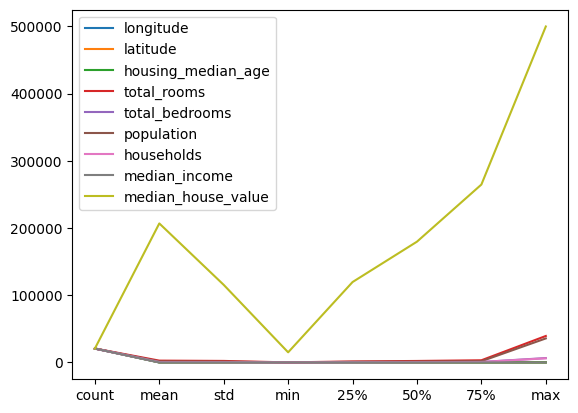

In [98]:
stat.plot()

Text(0.5, 1.0, 'Income vs Home value')

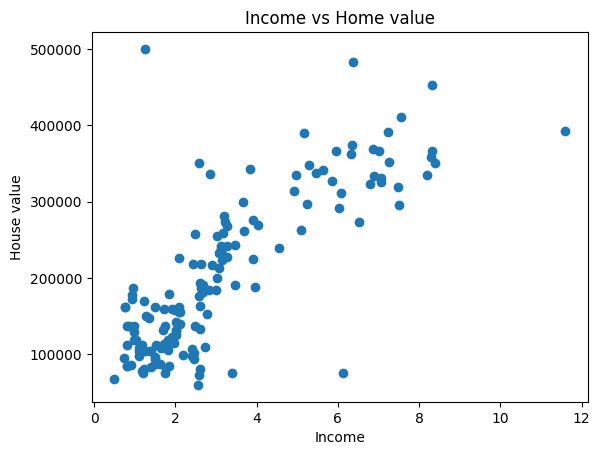

In [99]:
plt.scatter(df['median_income'][:150],df['median_house_value'][:150])
plt.xlabel('Income')
plt.ylabel('House value')
plt.title('Income vs Home value')

In [100]:
# One-hot encode categorical feature using pd.get_dummies()
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [101]:
# Prepare feature matrix X and target y
X = df.drop(columns=['median_house_value']).values
y = df['median_house_value'].values

In [102]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [103]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [104]:
def linear_regression(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    X = np.c_[np.ones(m), X]  # Add bias term
    theta = np.zeros(n + 1)

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradient

    return theta

In [105]:
# Train model
theta = linear_regression(X, y)

In [106]:
# Predictions
y_pred = np.c_[np.ones(X.shape[0]), X].dot(theta)

In [108]:
# Evaluate model
y = np.nan_to_num(y, nan=0)  # Replace NaN with 0 (or use np.nanmean(y) for mean imputation)
y_pred = np.nan_to_num(y_pred, nan=0)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 56104831989.8725
